# Import necessary libraries

1. networkx - for creating and manipulating graphs

2. random - random (aliased as rand) for random number generation

3. matplotlib - matplotlib.pyplot for plotting and visualizing graphs.

In [3]:
import networkx as nx # for creating and manipulating graphs
import random as rand # random (aliased as rand) for random number generation
import matplotlib.pyplot as plt # matplotlib.pyplot for plotting and visualizing graphs.

# Graph and Initial Population Creation Function

In [4]:
def generate_graph(num_nodes, num_edges):
    """
    Generates a graph based on number of nodes and edges

    Input:
    1 - num_nodes
    2 - num_edges

    Output:
    graph
    """
    return nx.gnm_random_graph(num_nodes, num_edges)

In [5]:
def generate_initial_population(graph, POPULATION_SIZE):
    """
    This function creates the initial population for a genetic algorithm by 
    generating random binary chromosomes, where each gene represents whether a 
    graph node is selected (1) or not (0)

    Input:
    1 - graph
    2 - POPULATION_SIZE

    Output:
    population
    """
    population = []
    for _ in range(POPULATION_SIZE):
        population.append([rand.choice([0,1]) for _ in range(graph.number_of_nodes())])

    return population

# Bit Flip Mutation Function

In [6]:
def mutation(offspring, MUTATION_RATE):
    """
    This function applies mutation to an offspring chromosome by flipping each 
    gene (0 to 1 or 1 to 0) with a probability defined by MUTATION_RATE.
    
    Input:
    1 - offspring
    2 - MUTATION_RATE
    
    Output:
    mutate
    """
    mutate = []
    for gene in offspring:
        if rand.uniform(0.0, 1.0) < MUTATION_RATE:
            mutate.append(1 - gene)
        else:
            mutate.append(gene)
    #print(mutate)
    return mutate

# Uniform Crossover Function

In [7]:
def uniform_crossover(parent1, parent2):
    """
    Uniform crossover combines the solutions of two parents 
    by selecting each gene from either parent with equal probability

    Input:
    1 - parent1
    2 - parent2

    output:
    1 - child
    """
    child = []
    for i in range(len(parent1)):
        if rand.uniform(0.0, 1.0) < 0.5:
            child.append(parent1[i])
        else:
            child.append(parent2[i])

    #print(child)

    return child

# Tournament Selection Function

In [8]:
def tournament_selection(population, fitness_score, tournament_size = 3):
    """
    Randomly select 3 candidate chromosomes from the population
    then choose the best solution out of the 3 candidates.

    Input:
    1 - population
    2 - fitness_score
    3 - tournament_size

    Output:
    selected_parent
    """
    
    T = tuple(zip(population,fitness_score))
    
    candidate = rand.sample(T, tournament_size)
    selected_parent = min(candidate, key=lambda x:x[1])[0]
        
    return selected_parent


# Graph Visualization 

In [9]:
def print_layout(graph, sol):
    """Displays graph layout with selected nodes colored in red
    
    Input:
    1 - graph
    2 - sol

    output:
    none
    
    """
    n_list = []
    pos = nx.circular_layout(graph)

    for i in range(len(sol)):
        if sol[i] == 1:
            n_list.append(i)
    
    nx.draw(graph, pos, with_labels=True)
    nx.draw_networkx_nodes(graph, pos, nodelist=n_list, node_color="tab:red")
    plt.show()

# Fitness Function

In [10]:
def fitness(G, ind, penalty_weight = 100):
   """"
   This function calculates the fitness of a vertex cover solution. It adds a penalty 
   for each uncovered edge and returns a score combining the number of selected vertices 
   and uncovered edges. Lower scores represent better solutions

   input:
   1 - G (graph)
   2 - ind
   3 - penalty_weight

   output:
   1 - score
   
   """
   score = 0
   uncovered = 0

   for u, v in G.edges:
      if ind[u] == 0 and ind[v] == 0:
         uncovered += 1
   score = sum(ind) + (uncovered * penalty_weight)
   return score

# Parameters

In [11]:
# Necessary Parameters
POPULATION_SIZE = 100
MUTATION_RATE = 0.01
GENERATION = 100
NUM_NODES = 30
NUM_EDGES = 40

# Genetic algorithm

In [12]:
G = generate_graph(NUM_NODES, NUM_EDGES)
pop = generate_initial_population(G, POPULATION_SIZE)
best_fitness_per_gen = [] # for plotting the fitness per generation

for i in range(GENERATION):
   fitness_score = [fitness(G, ind) for ind in pop]

   new_population = []
   
   for _ in range(POPULATION_SIZE):
      parent1 = tournament_selection(pop, fitness_score)
      parent2 = tournament_selection(pop, fitness_score)
      offspring = uniform_crossover(parent1, parent2)
      offspring = mutation(offspring, MUTATION_RATE)
      new_population.append(offspring)

   
   pop = new_population
   fitness_score = [fitness(G, ind) for ind in pop]
   best_fitness = min(fitness_score)
   best_fitness_per_gen.append(best_fitness)
   print(f"Generation {i} : Best Fitness : {best_fitness} Index: {fitness_score.index(min(fitness_score))}")

Generation 0 : Best Fitness : 120 Index: 97
Generation 1 : Best Fitness : 21 Index: 90
Generation 2 : Best Fitness : 18 Index: 45
Generation 3 : Best Fitness : 17 Index: 65
Generation 4 : Best Fitness : 17 Index: 26
Generation 5 : Best Fitness : 16 Index: 46
Generation 6 : Best Fitness : 17 Index: 55
Generation 7 : Best Fitness : 17 Index: 92
Generation 8 : Best Fitness : 17 Index: 32
Generation 9 : Best Fitness : 17 Index: 3
Generation 10 : Best Fitness : 16 Index: 54
Generation 11 : Best Fitness : 15 Index: 13
Generation 12 : Best Fitness : 15 Index: 36
Generation 13 : Best Fitness : 15 Index: 7
Generation 14 : Best Fitness : 14 Index: 2
Generation 15 : Best Fitness : 14 Index: 7
Generation 16 : Best Fitness : 14 Index: 12
Generation 17 : Best Fitness : 14 Index: 4
Generation 18 : Best Fitness : 14 Index: 1
Generation 19 : Best Fitness : 14 Index: 1
Generation 20 : Best Fitness : 14 Index: 0
Generation 21 : Best Fitness : 14 Index: 0
Generation 22 : Best Fitness : 14 Index: 0
Generat

# Genetic Algorithm's Performance

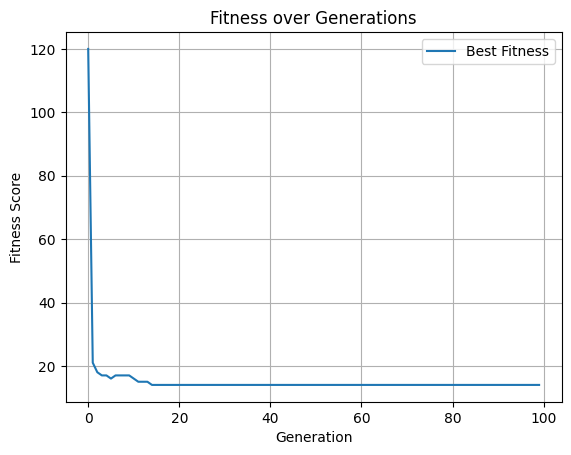

In [13]:
plt.plot(best_fitness_per_gen, label='Best Fitness')
plt.xlabel('Generation')
plt.ylabel('Fitness Score')
plt.title('Fitness over Generations')
plt.legend()
plt.grid(True)
plt.show()

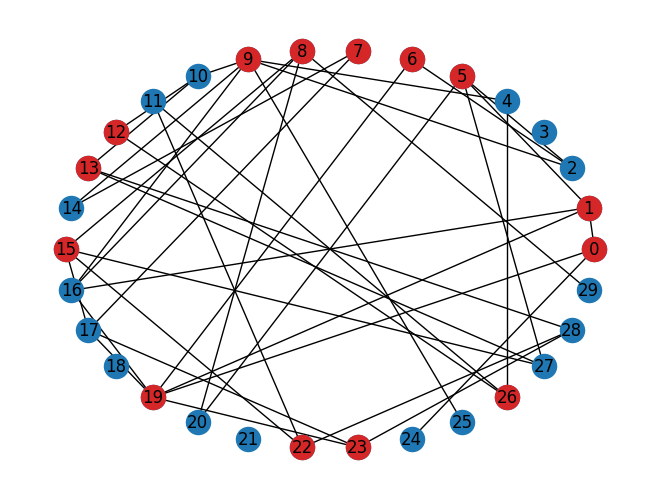

In [14]:
print_layout(G, pop[4])